In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [9]:
def plot_histograms_grid(df, columns=None, max_cols=3, figsize=(15, 5)):
    """
    Plots multiple histograms in a grid layout.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list): List of column names to plot. If None, plots all numeric columns.
        max_cols (int): Number of plots per row (default: 3)
        figsize (tuple): Size of each subplot (width per plot, height total)
    """
    # If columns is None or empty, take all numeric columns from the dataframe
    if columns is None or len(columns) == 0:
        columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

    n = len(columns)
    if n == 0:
        print("No numeric columns to plot.")
        return

    rows = math.ceil(n / max_cols)
    fig, axes = plt.subplots(rows, max_cols, figsize=(figsize[0], figsize[1]*rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        data = df[col].dropna()
        q25, q75 = np.percentile(data, [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(data) ** (1/3))
        bins = int((data.max() - data.min()) / bin_width) if bin_width > 0 else 10

        axes[i].hist(data, bins=bins, edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    # Turn off empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
df = pd.read_csv('../data/processed/heart_cleaned.csv')
df.shape

(918, 15)

In [ ]:
# 2. Cholesterol per Age - helps interpret high cholesterol relative to age
df['CholesterolPerAge'] = df['Cholesterol'] / df['Age']

In [ ]:
# 3. HRRatio - compares heart rate to predicted maximum (220 - age)
df['HRRatio'] = df['MaxHR'] / (220 - df['Age'])

In [ ]:
# 1. Create combination as a string
df['Sex_FastingBS_Group'] = df['Sex'].astype(str) + '_' + df['FastingBS'].astype(str)

# 2. Calculate frequency for each combination
freq_map = df['Sex_FastingBS_Group'].value_counts(normalize=True).to_dict()

# 3. Apply frequency encoding
df['Sex_FastingBS_Freq'] = df['Sex_FastingBS_Group'].map(freq_map)

# 4. (Optional) Drop the string column
df.drop(columns='Sex_FastingBS_Group', inplace=True)

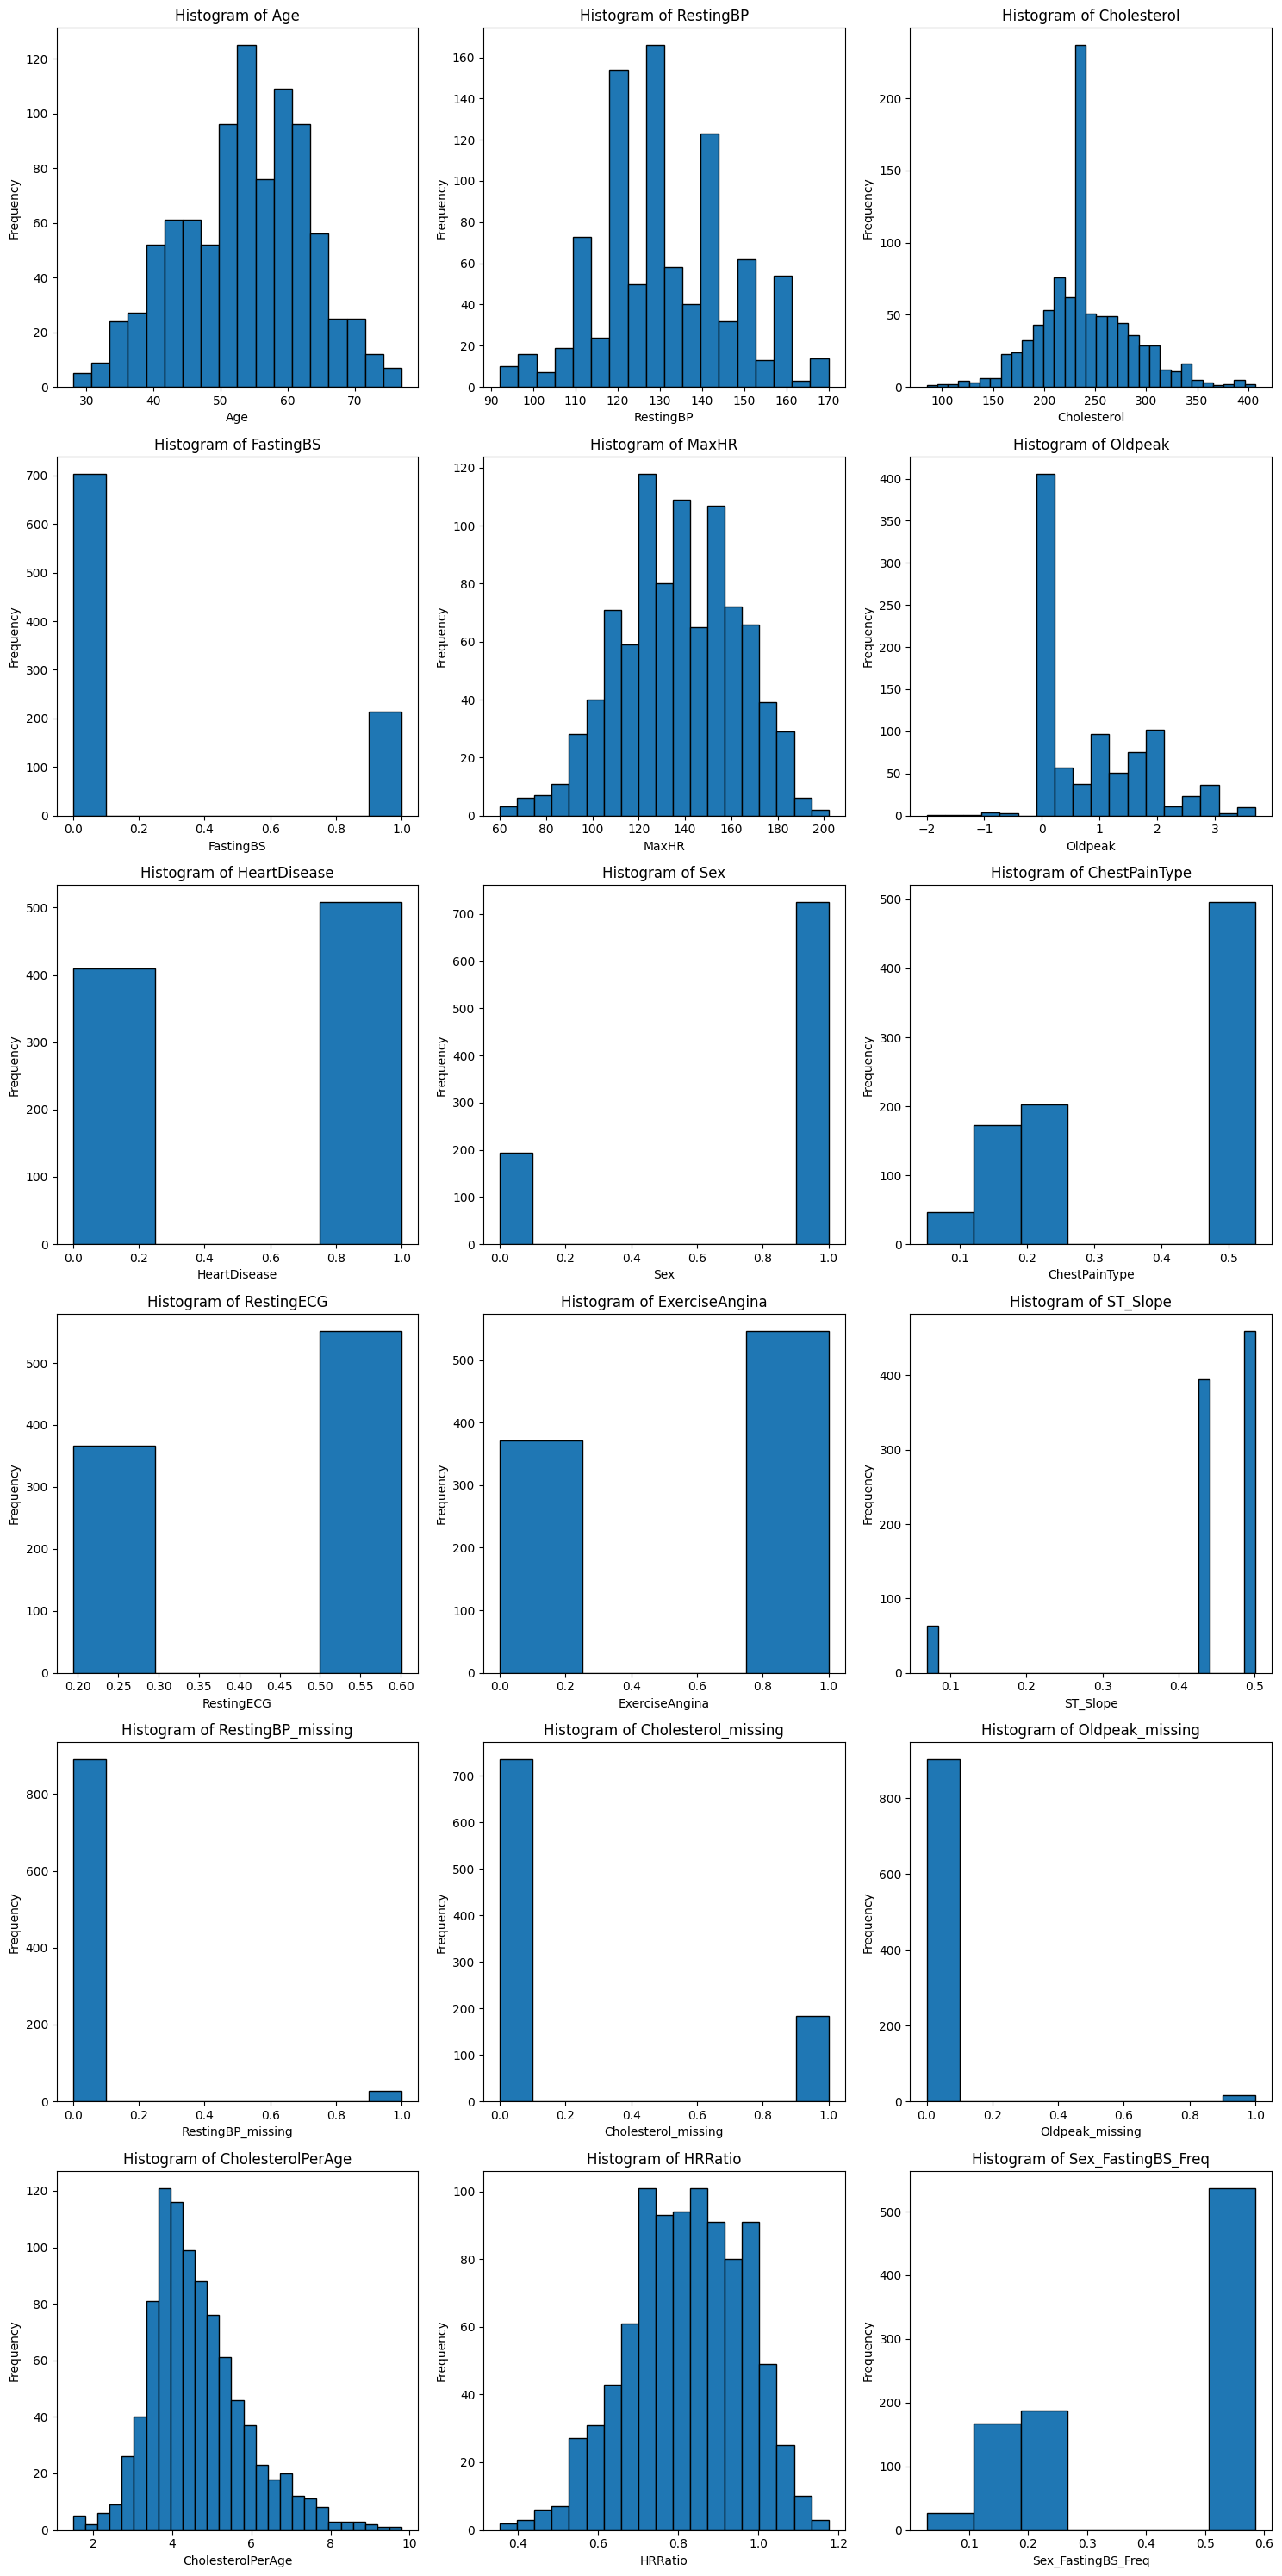

In [14]:
plot_histograms_grid(df = df)


## Feature Engineering Summary: New Feature Interpretations

Several engineered features were added to enrich the dataset. Below is a brief interpretation of each based on their distribution and clinical intuition.

---

### `CholesterolPerAge`

**Description**: Ratio of cholesterol to age, highlighting disproportionally high cholesterol in younger individuals.

**Distribution Insight**:
- Right-skewed but smooth
- No distortion from missing value imputation
- Captures relative risk more effectively than absolute cholesterol

---

### `HRRatio`

**Description**: Ratio of actual max heart rate to theoretical maximum (220 - age).

**Distribution Insight**:
- Centered near 0.8–1.0, as expected physiologically
- No outliers or spikes
- Provides a normalized view of exertion capacity

---

### `Sex_FastingBS_Freq`

**Description**: Frequency encoding of the interaction between sex and fasting blood sugar status.

**Distribution Insight**:
- Discrete distribution across 4 logical combinations
- One dominant class (e.g., male with normal sugar), which aligns with population patterns
- Frequency encoding avoids one-hot expansion and integrates cleanly with most models

---

These features are well-behaved, interpretable, and add domain-relevant nuance to the dataset. No anomalies were observed in their distributions.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  918 non-null    int64  
 1   RestingBP            918 non-null    float64
 2   Cholesterol          918 non-null    float64
 3   FastingBS            918 non-null    int64  
 4   MaxHR                918 non-null    int64  
 5   Oldpeak              918 non-null    float64
 6   HeartDisease         918 non-null    int64  
 7   Sex                  918 non-null    int64  
 8   ChestPainType        918 non-null    float64
 9   RestingECG           918 non-null    float64
 10  ExerciseAngina       918 non-null    int64  
 11  ST_Slope             918 non-null    float64
 12  RestingBP_missing    918 non-null    int64  
 13  Cholesterol_missing  918 non-null    int64  
 14  Oldpeak_missing      918 non-null    int64  
 15  CholesterolPerAge    918 non-null    flo

In [16]:
df.to_csv('../data/processed/heart_feature_engineering.csv', index = False)